In [1]:
import pandas as pd
import numpy as np

## Load data
UCI abalone dataset

In [2]:
# link = "https://archive.ics.uci.edu/ml/machine-learning-databases/abalone/abalone.data"

In [3]:
data = pd.read_csv('https://raw.githubusercontent.com/pnhuy/bioinfo/master/datasets/abalone/abalone.csv')

In [4]:
data.sample(5)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
1471,M,0.530,0.400,0.125,0.7575,0.3980,0.1510,0.1750,8
1785,F,0.535,0.425,0.135,0.7710,0.3765,0.1815,0.1795,8
3226,F,0.420,0.320,0.130,0.4135,0.1645,0.1060,0.1190,10
3620,F,0.640,0.500,0.170,1.2645,0.5650,0.3375,0.3150,9
4074,I,0.520,0.400,0.140,0.6220,0.2780,0.1455,0.1690,8


In [5]:
print(data.shape)

(4177, 9)


## detect class imbalance

<AxesSubplot:>

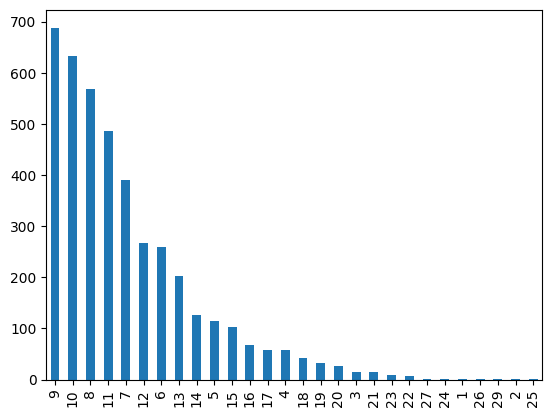

In [6]:
g = data["rings"].value_counts()
g.plot.bar()

In [7]:
types = data.dtypes
print(types)

sex                object
length            float64
diameter          float64
height            float64
whole_weight      float64
shucked_weight    float64
viscera_weight    float64
shell_weight      float64
rings               int64
dtype: object


## detect NA values

In [8]:
data.isna().sum()

sex               0
length            0
diameter          0
height            0
whole_weight      0
shucked_weight    0
viscera_weight    0
shell_weight      0
rings             0
dtype: int64

## Encode categorical features into numerical ones 

In [9]:
from sklearn.preprocessing import LabelEncoder 
le = LabelEncoder()

le.fit_transform(data.sex)
data.sex = le.transform(data.sex)

In [10]:
data.sample(3)

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,rings
3769,0,0.560,0.430,0.145,0.8980,0.3895,0.2325,0.245,9
3640,1,0.445,0.345,0.120,0.4035,0.1690,0.0825,0.130,7
1650,1,0.590,0.460,0.145,0.9015,0.4190,0.1785,0.260,11


## X, y separation

In [11]:
X = data.values[:, :-1]
y = data.values[:, -1]
print(X.shape)
print(y.shape)

(4177, 8)
(4177,)


## Normalization

In [12]:
from sklearn.preprocessing import MinMaxScaler

In [13]:
scaler = MinMaxScaler()
scaler.fit_transform(X)
X = scaler.transform(X)

In [14]:
X[0]

array([1.        , 0.51351351, 0.5210084 , 0.0840708 , 0.18133522,
       0.15030262, 0.1323239 , 0.14798206])

# Modeling


## Train test split

In [15]:
from sklearn.model_selection import train_test_split

In [16]:
X_train, X_test, y_train, y_test = train_test_split(X, y, train_size=0.9)

In [17]:
X_train.shape, X_test.shape

((3759, 8), (418, 8))

## K-Nearest Neighbor

## Normal KNN

In [18]:
from sklearn.neighbors import KNeighborsClassifier

In [19]:
knn = KNeighborsClassifier(n_neighbors=50)
knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50)

In [20]:
from sklearn.metrics import accuracy_score, classification_report, mean_squared_error as mse, mean_absolute_error as mae

In [21]:
y_pred_knn = knn.predict(X_test)
knn_score = accuracy_score(y_pred=y_pred_knn, y_true=y_test)
print(f"acc: {knn_score*100:.2f} %")

acc: 27.75 %


In [22]:
mse_knn = mse(y_pred_knn, y_test)
mae_knn = mae(y_pred_knn, y_test)

In [23]:
print(classification_report(y_pred=y_pred_knn, y_true=y_test))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         4
         4.0       0.17      0.25      0.20         4
         5.0       0.33      0.44      0.38         9
         6.0       0.23      0.26      0.25        27
         7.0       0.32      0.30      0.31        47
         8.0       0.34      0.35      0.34        43
         9.0       0.30      0.45      0.36        78
        10.0       0.16      0.33      0.22        55
        11.0       0.42      0.37      0.39        54
        12.0       0.67      0.07      0.12        29
        13.0       0.00      0.00      0.00        16
        14.0       0.00      0.00      0.00        17
        15.0       0.00      0.00      0.00         7
        16.0       0.00      0.00      0.00        10
        17.0       0.00      0.00      0.00         4
        18.0       0.00      0.00      0.00         5
        19.0       0.00    

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

## Weighted-distance KNN

In [24]:
w_knn = KNeighborsClassifier(n_neighbors=50, weights="distance")
w_knn.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=50, weights='distance')

In [25]:
y_pred_wknn = w_knn.predict(X_test)
wknn_score = accuracy_score(y_pred=y_pred_wknn, y_true=y_test)
print(f"acc: {wknn_score*100:.2f} %")

acc: 27.51 %


In [26]:
mse_wknn = mse(y_pred_wknn, y_test)
mae_wknn = mae(y_pred_wknn, y_test)

In [27]:
print(classification_report(y_pred=y_pred_wknn, y_true=y_test))

              precision    recall  f1-score   support

         2.0       0.00      0.00      0.00         1
         3.0       0.00      0.00      0.00         4
         4.0       0.14      0.25      0.18         4
         5.0       0.29      0.44      0.35         9
         6.0       0.22      0.19      0.20        27
         7.0       0.30      0.30      0.30        47
         8.0       0.31      0.30      0.31        43
         9.0       0.33      0.46      0.38        78
        10.0       0.17      0.33      0.23        55
        11.0       0.40      0.41      0.40        54
        12.0       0.40      0.07      0.12        29
        13.0       0.00      0.00      0.00        16
        14.0       0.00      0.00      0.00        17
        15.0       0.00      0.00      0.00         7
        16.0       0.00      0.00      0.00        10
        17.0       0.00      0.00      0.00         4
        18.0       0.00      0.00      0.00         5
        19.0       0.00    

c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, msg_start, len(result))
c:\Users\ASUS\AppData\Local\Programs\Python\Python310\lib\site-packages\sklearn\metrics\_classification.py:1334: UndefinedMetricWarning: Precision and F-score are ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, mo

# Decision Tree

In [28]:
from sklearn.tree import DecisionTreeClassifier, DecisionTreeRegressor

In [29]:
dt = DecisionTreeClassifier()
dt.fit(X_train, y_train)

DecisionTreeClassifier()

In [30]:
y_pred_dt = dt.predict(X_test)
dt_score = accuracy_score(y_pred=y_pred_dt, y_true=y_test)
print(f"acc: {dt_score*100:.2f} %")

acc: 19.86 %


In [31]:
mse_dt = mse(y_pred_dt, y_test)
mae_dt = mae(y_pred_dt, y_test)

---

In [32]:
dtr = DecisionTreeClassifier()
dtr.fit(X_train, y_train)
y_pred_dtr = dtr.predict(X_test)
mse_dtr = mse(y_pred_dtr, y_test)
mae_dtr = mae(y_pred_dtr, y_test)

---


In [33]:
from sklearn.neighbors import KNeighborsRegressor

## K-NN Regression

In [34]:
knr = KNeighborsRegressor(n_neighbors=30)
knr.fit(X_train, y_train)

KNeighborsRegressor(n_neighbors=30)

In [35]:
y_pred_knr = knr.predict(X_test)
mse_knr = mse(y_pred_knr, y_test)
mae_knr = mae(y_pred_knr, y_test)

## K-NN Regression WD

In [36]:
wknr = KNeighborsRegressor(n_neighbors=30, weights="distance")
wknr.fit(X_train, y_train)
y_pred_wknr = wknr.predict(X_test)
mse_wknr = mse(y_pred_wknr, y_test)
mae_wknr = mae(y_pred_wknr, y_test)

---

In [37]:
mses = [mse_knn, mse_wknn, mse_knr, mse_wknr, mse_dt,mse_dtr]
maes = [mae_knn, mae_wknn, mae_knr, mae_wknr, mae_dt,mae_dtr]
acc = [knn_score, wknn_score, dt_score]
model = ["knn", "weighted-distance knn", "knn regressor", "weighted-distance knn regressor", "decision tree", "decision tree regressor"]

## plotting metrics

In [38]:
import matplotlib.pyplot as plt

In [39]:
acc

[0.27751196172248804, 0.2751196172248804, 0.19856459330143542]

Text(0.5, 1.0, 'MSE and MAE comparision')

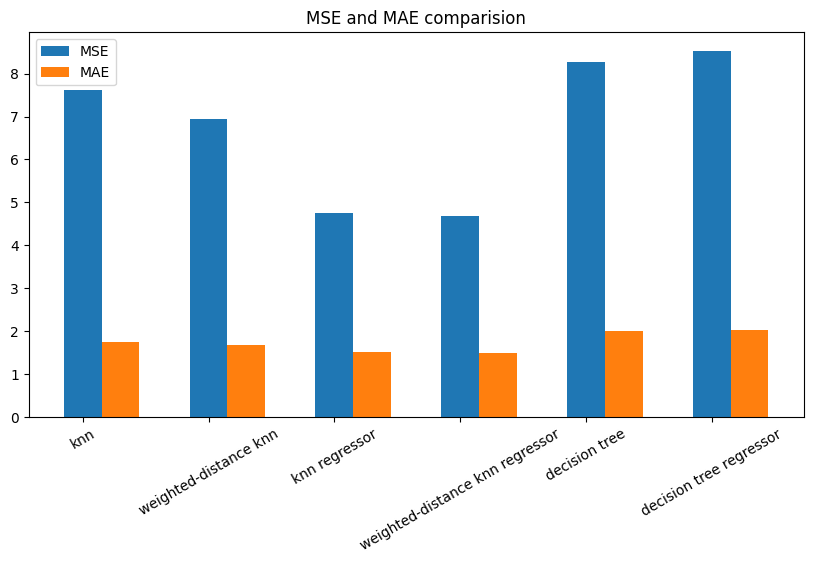

In [40]:
fig, ax = plt.subplots(1,1, figsize = [10, 5])

width = 0.3
x_axis = np.arange(len(model))

# ax.bar(x_axis + width, acc, width = width, label = "accuracy")
ax.bar(x_axis, mses, width = width, label = "MSE")
ax.bar(x_axis + width, maes, width = width, label = "MAE")
ax.set_xticks(x_axis, model, rotation=30)
ax.legend()
ax.set_title("MSE and MAE comparision")